In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read variables
validate_hist = pd.read_csv("./models/baseline_model_2021-11-30 22:51_validate.csv")
training_hist = pd.read_csv("./models/baseline_model_2021-11-30 22:51_training.csv")

In [3]:
# combine loss/acc over time for comparison
merged = pd.merge(training_hist, validate_hist, on="Unnamed: 0").drop("Unnamed: 0", axis=1)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   loss_x  1000 non-null   float64
 1   acc_x   1000 non-null   float64
 2   loss_y  1000 non-null   float64
 3   acc_y   1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB


#### Attempt 1: 4 Layer MLP, 300 Epochs
Model structure:
```
self.fc = nn.Sequential(
            nn.Linear(18, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 4), 
            nn.Sigmoid()
        )
```
Parameters:
```
TRAIN_RATIO = 0.85
NUM_EPOCHS = 300
LR = 0.01
BATCH_SIZE = 32

criterion = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=LR)
acc = sklearn.metrics.accuracy_score(target, preds)
```

<AxesSubplot:>

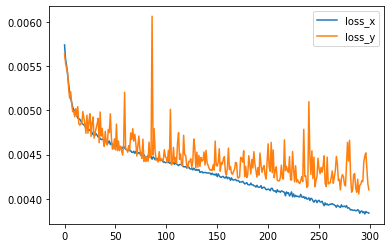

In [9]:
merged.plot(y=["loss_x", "loss_y"])

<AxesSubplot:>

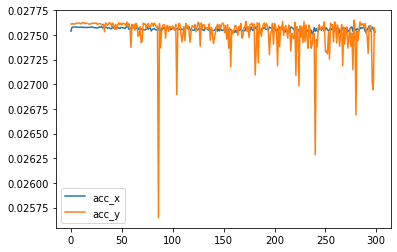

In [10]:
merged.plot(y=["acc_x", "acc_y"])

#### Attempt 2: 5 Layer MLP, 1000 Epochs
Model:
```
self.fc = nn.Sequential(
            nn.Linear(18, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 4), 
            nn.Sigmoid()
        )
```
Parameters:
```
TRAIN_RATIO = 0.85
NUM_EPOCHS = 1000
LR = 0.01
BATCH_SIZE = 128

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=LR)
acc = sklearn.metrics.accuracy_score(target, preds)
```

<AxesSubplot:title={'center':'Training (loss_x) and validation (loss_y) loss over time'}>

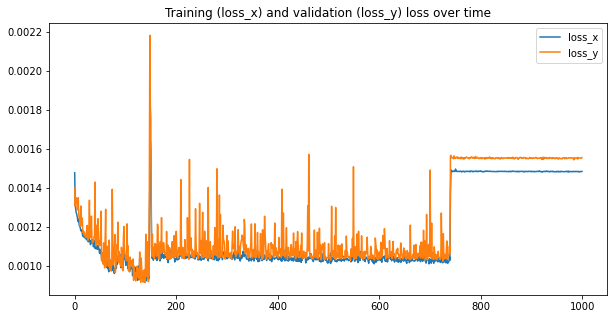

In [6]:
merged.plot(y=["loss_x", "loss_y"], figsize=(10,5), legend=True, title=("Training (loss_x) and validation (loss_y) loss over time"))

(0.0, 1.0)

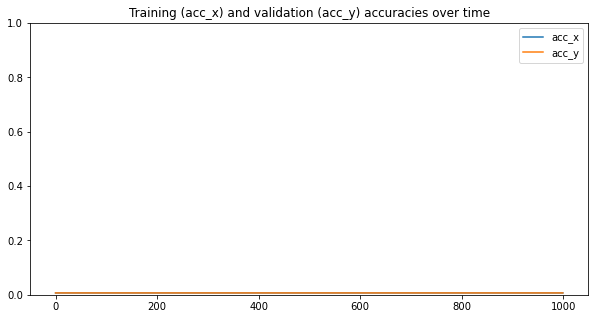

In [9]:
ax = merged.plot(y=["acc_x", "acc_y"], figsize=(10,5), legend=True, title="Training (acc_x) and validation (acc_y) accuracies over time")
ax.set_ylim(0, 1)

#### Attempt 3: 10 Layer MLP, 1000 Epochs
Model:
```
self.fc = nn.Sequential(
            nn.Linear(18, 256),
            nn.ReLU(),
            nn.Linear(256, 256), # 9 such identical hidden layers
            nn.ReLU(),           # 9 such activations
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 4), 
            nn.Sigmoid()
        )
```
Parameters:
```
TRAIN_RATIO = 0.85
NUM_EPOCHS = 1000
LR = 0.01
BATCH_SIZE = 128

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=LR)
acc = sklearn.metrics.accuracy_score(target, preds)
```

<AxesSubplot:title={'center':'Training (loss_x) and validation (loss_y) loss over time'}>

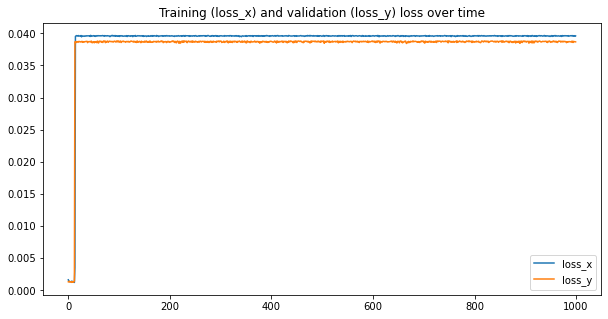

In [4]:
merged.plot(y=["loss_x", "loss_y"], figsize=(10,5), legend=True, title=("Training (loss_x) and validation (loss_y) loss over time"))

(0.0, 1.0)

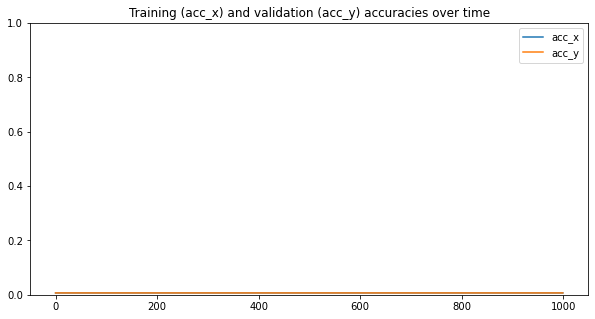

In [5]:
ax = merged.plot(y=["acc_x", "acc_y"], figsize=(10,5), legend=True, title="Training (acc_x) and validation (acc_y) accuracies over time")
ax.set_ylim(0, 1)